# Importing data

In [60]:
import pandas as pd
import numpy as np

#load csv data
df = pd.read_csv('osteo data.csv')

#rename the columns
df.rename(columns={'lean.mass':'lean(kg)','fat.mass':'fat(kg)','age':'age(year)',
                   'height':'height(cm)','weight':'weight(kg)','bmi':'bmi(kg/m2)'},
                   inplace=True)
df.head(10)

,id,lean(kg),fat(kg),pcfat,age(year),height(cm),weight(kg),bmi(kg/m2),osta,osteo.group
0,1,27.98,16.49,37.09,76,156.0,45.0,18.5,6.2,Osteoporosis
1,8,29.02,27.54,48.70,54,153.0,56.0,23.9,-0.4,Osteopenia
2,21,31.72,20.65,39.43,56,158.2,51.5,20.6,0.9,Osteopenia
3,38,35.96,21.96,37.92,54,154.0,51.0,21.5,0.6,Osteopenia
4,39,35.00,26.29,42.89,60,159.5,60.0,23.6,0.0,Osteopenia
5,53,32.58,19.82,37.82,53,156.0,51.0,21.0,0.4,Osteopenia
6,57,29.46,23.24,44.09,66,150.4,52.0,23.0,2.8,Osteopenia
7,61,27.13,26.05,48.98,60,142.8,NaN,25.5,1.6,Normal
8,63,31.20,23.45,42.91,57,141.9,54.0,26.8,0.6,Osteopenia
9,80,28.77,23.29,44.74,62,145.8,47.5,22.3,2.9,Normal


# Data pre-processing

In [61]:
#overal checking data types and missing values of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           300 non-null    int64  
 1   lean(kg)     300 non-null    float64
 2   fat(kg)      300 non-null    float64
 3   pcfat        300 non-null    float64
 4   age(year)    300 non-null    int64  
 5   height(cm)   293 non-null    float64
 6   weight(kg)   295 non-null    float64
 7   bmi(kg/m2)   300 non-null    float64
 8   osta         300 non-null    float64
 9   osteo.group  300 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 23.6+ KB


In [62]:
df.isnull().sum()

id             0
lean(kg)       0
fat(kg)        0
pcfat          0
age(year)      0
height(cm)     7
weight(kg)     5
bmi(kg/m2)     0
osta           0
osteo.group    0
dtype: int64

In [63]:
#checking null data for height and weight features
df.loc[df['height(cm)'].isnull() | df['weight(kg)'].isnull()]

,id,lean(kg),fat(kg),pcfat,age(year),height(cm),weight(kg),bmi(kg/m2),osta,osteo.group
7,61,27.13,26.05,48.98,60,142.8,NaN,25.5,1.6,Normal
16,113,24.75,17.57,41.52,60,141.5,NaN,20.7,3.7,Normal
29,195,28.94,18.16,38.55,51,NaN,46.5,20.0,0.9,Osteoporosis
37,244,34.58,22.02,38.91,58,152.5,NaN,23.6,0.6,Osteopenia
60,404,32.99,19.82,37.53,63,NaN,52.0,22.7,2.2,Normal
81,663,26.67,20.00,42.85,56,NaN,46.0,21.0,2.0,Normal
98,890,31.51,25.37,44.60,60,153.5,NaN,23.8,0.8,Osteopenia
106,937,31.39,29.86,48.75,64,NaN,61.0,28.1,0.6,Osteopenia
133,1412,36.60,25.69,41.24,55,NaN,62.0,24.2,-1.4,Osteopenia
172,1952,38.94,31.93,45.05,60,NaN,69.0,28.6,-1.8,Osteopenia


In [64]:
df.describe()

,id,lean(kg),fat(kg),pcfat,age(year),height(cm),weight(kg),bmi(kg/m2),osta
count,300.000000,300.000000,300.000000,300.000000,300.000000,293.000000,295.000000,300.000000,300.000000
mean,1691.363333,30.847100,23.405233,42.828333,59.816667,151.440956,53.515254,23.291000,1.265000
std,1202.947041,4.232483,5.109073,4.336179,7.758676,5.537601,8.343025,3.261709,2.480939
min,1.000000,18.410000,10.330000,27.690000,50.000000,128.000000,30.000000,15.700000,-6.200000
25%,551.000000,28.400000,20.060000,40.197500,54.000000,148.000000,48.000000,20.975000,-0.300000
50%,1604.500000,30.505000,23.280000,43.025000,58.000000,152.100000,52.500000,23.200000,0.900000
75%,2502.000000,33.140000,26.207500,45.895000,63.000000,155.100000,59.000000,25.325000,2.650000
max,4178.000000,60.200000,44.090000,53.310000,93.000000,167.600000,83.000000,34.700000,9.500000


In [65]:
#Data imputation using KNN imputer
from sklearn.impute import KNNImputer

#retrieve list of participants with null in height or weight
ID =df.loc[df['height(cm)'].isnull() | df['weight(kg)'].isnull()]['id']

#retrieve list of major features for imputation purpose
features = ['lean(kg)','fat(kg)','pcfat','age(year)','height(cm)','weight(kg)']

#initialize KNNImputer and impute the missing values with selected features
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(df[features])

#convert the imputed values into dataframe
df_temp = pd.DataFrame(imputed_data, columns=features)

#replace the missing values with the imputed values
df['height(cm)'] = df_temp['height(cm)']
df['weight(kg)'] = df_temp['weight(kg)']

#retrieve new dataset with given id for cross checking
df.loc[df['id'].isin(ID)]


,id,lean(kg),fat(kg),pcfat,age(year),height(cm),weight(kg),bmi(kg/m2),osta,osteo.group
7,61,27.13,26.05,48.98,60,142.800000,50.166667,25.5,1.6,Normal
16,113,24.75,17.57,41.52,60,141.500000,42.666667,20.7,3.7,Normal
29,195,28.94,18.16,38.55,51,150.333333,46.500000,20.0,0.9,Osteoporosis
37,244,34.58,22.02,38.91,58,152.500000,57.166667,23.6,0.6,Osteopenia
60,404,32.99,19.82,37.53,63,150.700000,52.000000,22.7,2.2,Normal
81,663,26.67,20.00,42.85,56,147.766667,46.000000,21.0,2.0,Normal
98,890,31.51,25.37,44.60,60,153.500000,58.000000,23.8,0.8,Osteopenia
106,937,31.39,29.86,48.75,64,150.766667,61.000000,28.1,0.6,Osteopenia
133,1412,36.60,25.69,41.24,55,157.200000,62.000000,24.2,-1.4,Osteopenia
172,1952,38.94,31.93,45.05,60,150.600000,69.000000,28.6,-1.8,Osteopenia


In [66]:
#transform the target variables (normal, osteopenia, and osteoporosis) into numeric values for ML purpose
osteo_group = {'Normal':0,'Osteopenia':1, 'Osteoporosis':2}
df['osteo.group.map'] = df['osteo.group'].map(osteo_group)

#drop column id
df = df.drop(columns=['id'])
df.head(10)

,lean(kg),fat(kg),pcfat,age(year),height(cm),weight(kg),bmi(kg/m2),osta,osteo.group,osteo.group.map
0,27.98,16.49,37.09,76,156.0,45.000000,18.5,6.2,Osteoporosis,2
1,29.02,27.54,48.70,54,153.0,56.000000,23.9,-0.4,Osteopenia,1
2,31.72,20.65,39.43,56,158.2,51.500000,20.6,0.9,Osteopenia,1
3,35.96,21.96,37.92,54,154.0,51.000000,21.5,0.6,Osteopenia,1
4,35.00,26.29,42.89,60,159.5,60.000000,23.6,0.0,Osteopenia,1
5,32.58,19.82,37.82,53,156.0,51.000000,21.0,0.4,Osteopenia,1
6,29.46,23.24,44.09,66,150.4,52.000000,23.0,2.8,Osteopenia,1
7,27.13,26.05,48.98,60,142.8,50.166667,25.5,1.6,Normal,0
8,31.20,23.45,42.91,57,141.9,54.000000,26.8,0.6,Osteopenia,1
9,28.77,23.29,44.74,62,145.8,47.500000,22.3,2.9,Normal,0


# Exploratory Data Analysis and Visualization

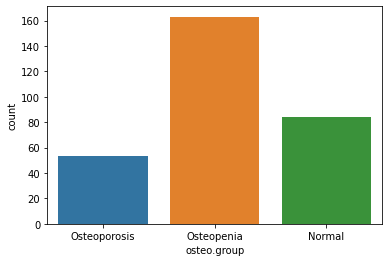

Normal: 28.00%
Osteopenia: 54.33%
Osteoporosis: 17.67%


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

#count the number of observations for nomal or disease group
sns.countplot(x='osteo.group',data=df)
plt.show()

#propotion of each groups
print("Normal: {:.2%}".format(len(df[df['osteo.group.map']==0])/len(df)))
print("Osteopenia: {:.2%}".format(len(df[df['osteo.group.map']==1])/len(df)))
print("Osteoporosis: {:.2%}".format(len(df[df['osteo.group.map']==2])/len(df)))

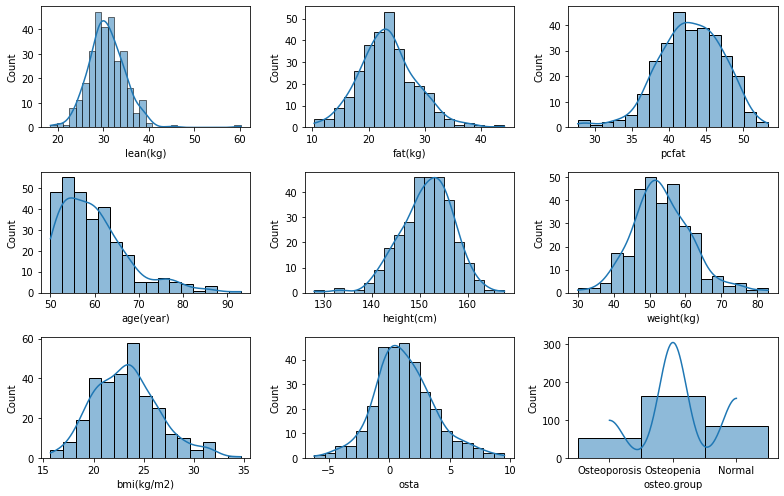

In [68]:
#histogram charts to check distribution/skewness of each features
fig, axs = plt.subplots(3,3,figsize=(11,7))

#draw the histogram chart for each feature
for i in range(0,3):
    for j in range(0,3):
        sns.histplot(data=df,x=df.columns[i*3+j], kde=True, ax=axs[i,j])
        
fig.tight_layout()

plt.show()

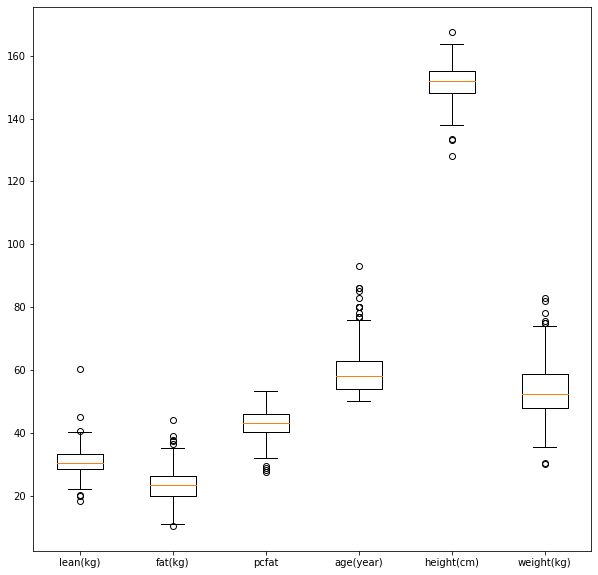

In [69]:
#conduct boxplot charts to detect outliers
plt.figure(figsize=(10, 10))

#retrieve columns and name from the dataset
cols = [df[col] for col in df.columns]
name = [col.name for col in cols]

#generate boxplots for major features
plt.boxplot(cols[0:6],labels=name[0:6]) 
plt.show()

            lean(kg)   fat(kg)     pcfat  age(year)  height(cm)  weight(kg)
lean(kg)    1.000000  0.590207 -0.015803  -0.263035    0.510281    0.808774
fat(kg)     0.590207  1.000000  0.782554  -0.140063    0.267061    0.882163
pcfat      -0.015803  0.782554  1.000000   0.020505   -0.058053    0.464865
age(year)  -0.263035 -0.140063  0.020505   1.000000   -0.209427   -0.191849
height(cm)  0.510281  0.267061 -0.058053  -0.209427    1.000000    0.428846
weight(kg)  0.808774  0.882163  0.464865  -0.191849    0.428846    1.000000


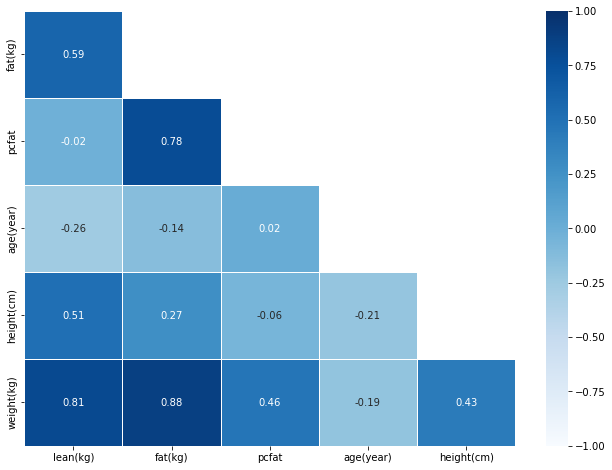

In [70]:
#building the correlation matrix
plt.figure(figsize=(11, 8))
df_corr = df[name[0:6]].corr()
print(df_corr)

#Steps below to format the corelation matrix that only show the lower triangel 

#ones_like to build a matrix of boolean with the same shape of correlation matrix
ones_corr = np.ones_like(df_corr,dtype=bool)

#return only the upper matrix 
mask = np.triu(ones_corr)

#remove first row and last column of a mask
adj_mask = mask[1:,:-1]

#remove the top row and last column due to duplication matrix items
adj_df_corr = df_corr.iloc[1:,:-1]

#plotting the heatmap
sns.heatmap(data=adj_df_corr,mask=adj_mask,cmap="Blues",vmin=-1,vmax=1,annot=True,linewidths=1, fmt='.2f')
plt.xticks(rotation=0)
plt.show()

# Machine Learning Models

# Multinomial Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#retrieve the features used in the logistic regression model
features = ['lean(kg)','fat(kg)','pcfat','age(year)','height(cm)','weight(kg)']

#retrieve reponse Y and explanatory variables X
X = df[features]
y = df['osteo.group.map']

#splitting dataset into train and test with the ratio of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

#fitting the regression model
model = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='multinomial',max_iter=1000)
model.fit(X_train, y_train)

#predict results and probabilities of each feature
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
y_prob = np.round(y_prob,2)

#render the predicted results into dataframe
y_test1 = y_test.copy()
y_test1 = y_test1.to_frame().rename(columns={'osteo.group.map':'osteo.group_test'}).reset_index(drop=True)

y_pred = pd.DataFrame(y_pred,columns=['osteo.group_predict'])
result_df = pd.DataFrame(y_prob,columns=['%Normal','%Osteopenia', '%Osteoporosis'],)

pd.concat([y_test1,y_pred, result_df],axis=1)



,osteo.group_test,osteo.group_predict,%Normal,%Osteopenia,%Osteoporosis
0,0,1,0.36,0.59,0.05
1,1,1,0.23,0.67,0.10
2,1,1,0.20,0.73,0.07
3,0,0,0.52,0.46,0.02
4,1,1,0.16,0.57,0.27
...,...,...,...,...,...
70,0,0,0.96,0.04,0.00
71,1,1,0.08,0.76,0.16
72,2,2,0.00,0.04,0.96
73,1,1,0.07,0.72,0.21


In [72]:
#intercept and coefficient of the model
print('Intercept:\n',model.intercept_)
print('Coefficient:\n',model.coef_)
print('Classes:\n',model.classes_)

Intercept:
 [ 14.11224907 -13.83627986  -0.27596921]
Coefficient:
 [[ 0.11596936  0.16089289 -0.16017283 -0.13195626 -0.06202118  0.04778544]
 [ 0.16982029 -0.26457372  0.25758949  0.02382538  0.01358119  0.02441649]
 [-0.28578965  0.10368083 -0.09741666  0.10813088  0.04843998 -0.07220193]]
Classes:
 [0 1 2]


In [73]:
import statsmodels.api as sm
  
# copy the existing training set
X_train1 = X_train.copy()

#add the constant because intercept is not included by default
X_train1 = sm.add_constant(X_train1, prepend=False)

#fit the model
mnlreg = sm.MNLogit(y_train, X_train1).fit()

print (mnlreg.summary())

Optimization terminated successfully.
         Current function value: 0.730766
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:        osteo.group.map   No. Observations:                  225
Model:                        MNLogit   Df Residuals:                      211
Method:                           MLE   Df Model:                           12
Date:                Sun, 02 Oct 2022   Pseudo R-squ.:                  0.2773
Time:                        20:08:58   Log-Likelihood:                -164.42
converged:                       True   LL-Null:                       -227.50
Covariance Type:            nonrobust   LLR p-value:                 3.649e-21
osteo.group.map=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
lean(kg)              0.0903      0.250      0.361      0.718      -0.400       0.580
fat(kg) 

C:\Users\LENOVO\anaconda3\envs\hit140env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

#calculating matrices for performance evaluation
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
cr = classification_report(y_test,y_pred)

print('Confusion matrix: \n',cm)
print('Accuracy: ',ac)
print('Classification report: \n',cr)

Confusion matrix: 
 [[ 8  7  0]
 [ 6 37  4]
 [ 0  8  5]]
Accuracy:  0.6666666666666666
Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.53      0.55        15
           1       0.71      0.79      0.75        47
           2       0.56      0.38      0.45        13

    accuracy                           0.67        75
   macro avg       0.61      0.57      0.58        75
weighted avg       0.66      0.67      0.66        75



# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

#building the model with number of trees is 50, and the function is entropy to split the tree
clf = RandomForestClassifier(n_estimators=50, criterion='entropy')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#rending the outcomes
y_test1 = y_test.copy().to_frame()
y_test1 = y_test1.rename(columns={'osteo.group.map':'osteo.group_test'}).reset_index(drop=True)

y_pred = pd.DataFrame(y_pred,columns=['osteo.group_predict'])

pd.concat([y_test1,y_pred],axis=1)



,osteo.group_test,osteo.group_predict
0,0,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
70,0,0
71,1,2
72,2,2
73,1,1


In [87]:
#Evaluation of RandomforestClassifier
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
cr = classification_report(y_test,y_pred)

print('Confusion matrix: \n',cm)
print('Accuracy: ',ac)
print('Classification report: \n',cr)

Confusion matrix: 
 [[ 6  8  1]
 [ 7 31  9]
 [ 0  8  5]]
Accuracy:  0.56
Classification report: 
               precision    recall  f1-score   support

           0       0.46      0.40      0.43        15
           1       0.66      0.66      0.66        47
           2       0.33      0.38      0.36        13

    accuracy                           0.56        75
   macro avg       0.48      0.48      0.48        75
weighted avg       0.56      0.56      0.56        75

